In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Health_cleaned.csv')

In [3]:
df.head()

,hhidpn,rmstat,ragender,rahispan,raracem,riwbegy,ragey_b,sagey_b,rhltc,rhlthlm,...,cpi,rgov,sgov,inter_year,year_of_birth,total_work_earn,total_pension_earn,total_gov_income,total_income,without_work
0,2010,7,2,0,1,1998-06-15,63,.m,4,1,...,0.934777,7394.6318,0.0,1998,1935,0.0,0.00000,7394.6318,7394.63180,1
1,2010,7,2,0,1,1996-10-15,62,.m,3,1,...,0.891173,7374.7271,0.0,1996,1934,0.0,0.00000,7374.7271,7374.72710,1
2,2010,7,2,0,1,2000-03-15,65,.m,3,1,...,0.967805,7029.8052,0.0,2000,1935,0.0,0.00000,7029.8052,7029.80520,1
3,2010,7,2,0,1,1994-07-23,59,.m,3,1,...,0.852219,4023.5574,0.0,1994,1935,0.0,0.00000,4023.5574,4023.55740,1
4,2010,7,2,0,1,1992-09-18,57,.m,3,1,...,0.811126,4193.8506,0.0,1992,1935,0.0,3053.12332,4193.8506,7246.97392,1


In [5]:
df.columns

Index(['hhidpn', 'rmstat', 'ragender', 'rahispan', 'raracem', 'riwbegy',
       'ragey_b', 'sagey_b', 'rhltc', 'rhlthlm', 'rhibpe', 'rdiabe', 'rcancre',
       'rlunge', 'rhearte', 'rstroke', 'rpsyche', 'rarthre', 'rhosp',
       'rhspnit', 'oop_spend', 'riearn', 'ripena', 'siearn', 'sipena', 'rcovr',
       'rcovs', 'rlbrf', 'rjphys', 'rjlift', 'rjweeks', 'rjweek2', 'rjcten',
       'index_wave', 'insured_gov', 'uninsured', 'retired', 'collegeplus',
       'year', 'cpi', 'rgov', 'sgov', 'inter_year', 'year_of_birth',
       'total_work_earn', 'total_pension_earn', 'total_gov_income',
       'total_income', 'without_work'],
      dtype='object')

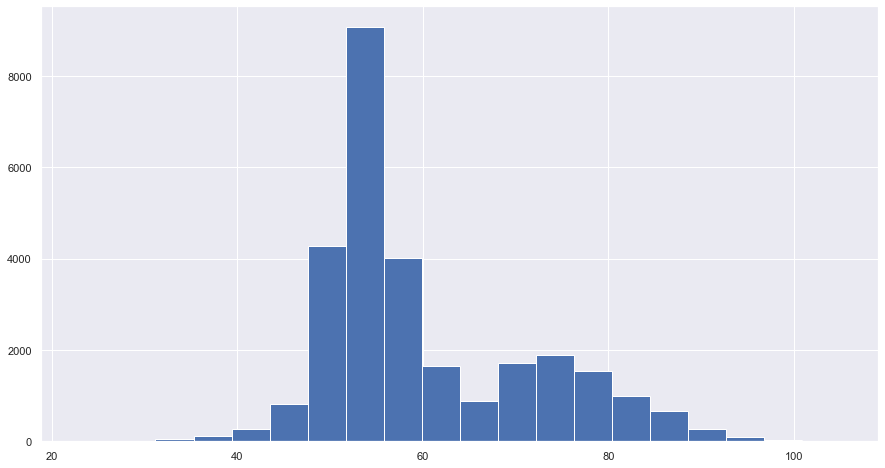

In [11]:
# histogram of ragey_b of index_wave = 1
sns.set()

plt.figure(figsize=(15, 8))
df[df['index_wave'] == 1]['ragey_b'].hist(bins=20)
plt.show()

In [13]:
df[(df['index_wave'] == 1) & (df['ragey_b'] > 50)].shape

(25148, 49)

In [14]:
df[(df['index_wave'] == 1) & (df['ragey_b'] <= 50)].shape

(3159, 49)

In [17]:
df[(df['index_wave'] == 1) & (df['riearn'] == 0)].shape

(12825, 49)

In [21]:
tmp = df[(df['index_wave'] == 1) & (df['ragey_b'] > 65)]

tmp[tmp['riearn'] == 0].shape[0] / tmp.shape[0] * 100

89.73048920679526

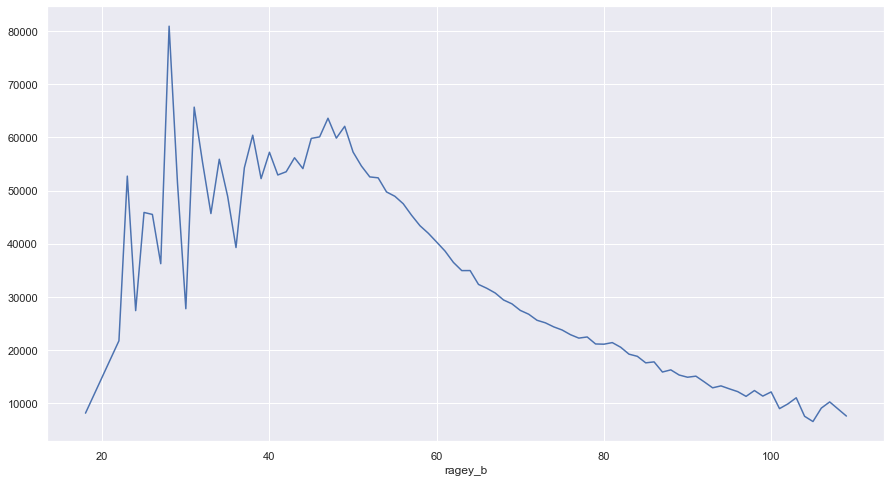

In [26]:
# plot median total_income by ragey_b in index_wave 1
plt.figure(figsize=(15, 8))
df[(df['total_income'] > 0)].groupby('ragey_b')['total_income'].median().plot()
plt.show()

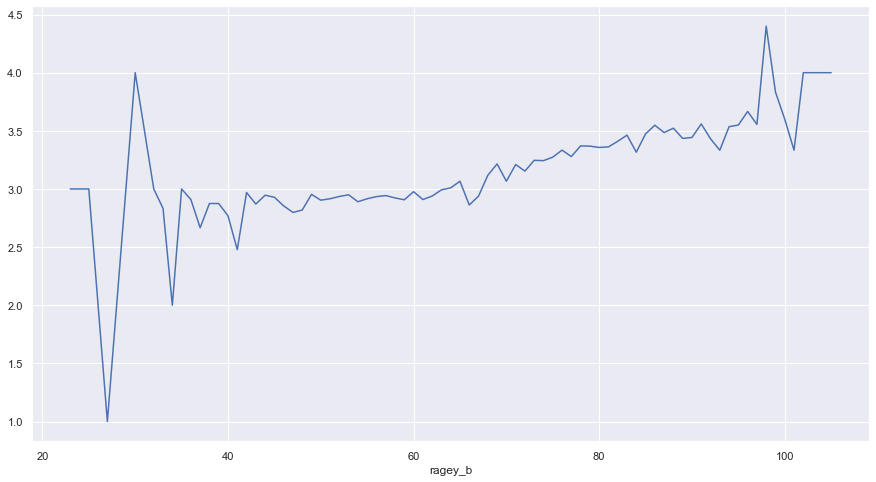

In [33]:
# plot the mean of rhltc by ragey_b
plt.figure(figsize=(15, 8))
tmp = df[(df['index_wave'] == 1) & (df['rhltc'] != '.m')]
tmp['rhltc'] = tmp['rhltc'].astype('int')
tmp.groupby('ragey_b')['rhltc'].mean().plot()
plt.show()

In [34]:
# percent of people with insured_gov
df[(df['insured_gov'] == 1)].shape[0] / df.shape[0] * 100

53.90575131323897

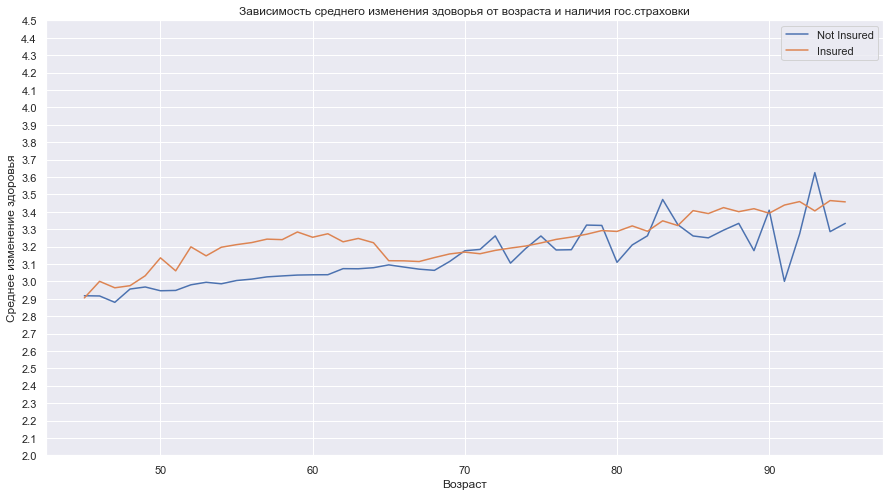

In [48]:
# line plot of mean of rhltc by ragey_b hue by insured_gov sns
plt.figure(figsize=(15, 8))
tmp = df[(df['rhltc'] != '.m') & (df['ragey_b'] >= 45) & (df['ragey_b'] <= 95)]
tmp['rhltc'] = tmp['rhltc'].astype('int')

sns.lineplot(x='ragey_b', y='rhltc', hue='insured_gov', data=tmp, ci=None)

plt.legend(['Not Insured', 'Insured'])
plt.yticks(np.arange(2, 4.6, 0.1))

plt.title('Зависимость среднего изменения здоворья от возраста и наличия гос.страховки')
plt.xlabel('Возраст')
plt.ylabel('Среднее изменение здоровья')

plt.show()